In [ ]:
import pandas as pd
import numpy as np

data = pd.read_csv("/home/j-k13b204/S13P31B204/model_test/Code/csv_collection/intent_dataset_comm.csv")
data.head()

FileNotFoundError: [Errno 2] No such file or directory: '/home/j-k13b204/S13P31B204/model_test/Code/csv_collection/intent_csv/intent_dataset_comm.csv'

In [4]:
data[data['intent_group'] == 'Integrity'].sample(frac=0.1)

,text,expression,intent_group
8963,첫 번째로는 어 경청하여 잘 들어주고 그 공무원으로서 일반 국민들의 문제를 다 해결...,p_cus_belief,Integrity
10777,그 써클 활동을 하면서 주말에는 시청이나 서울역 등 노숙자가 많이 있는 곳에 가서 ...,p_cus_orien,Integrity
4057,다른 계열사도 많이 있지만 특히 이 계열사에 지원한 이유는 이 계열사의 제품에 많은...,c_sincere_job,Integrity
30199,일단 고객도 다른 측면에서 보면 그냥 또 다른 한 명의 사람이기 때문에 일단 그...,p_cus_belief,Integrity
14322,보상을 요구하거나 아니면 환불 아니면 상품의 교체 고객과 대화를 시도해서 이런 것들...,p_voc,Integrity
...,...,...,...
21987,계열사에서 하고 있는 업무도 관심이 있지만 회사 분위기가 제가 원하던 분위기에 가깝...,c_sincere_job,Integrity
3414,이런 저의 역량과 업무에 대한 비전을 살려 교육 강사로서 더 많은 사람들에게 꿈을 ...,c_sincere_job,Integrity
1319,첫 번째로는 제가 디지털 경영학을 전공했기 때문에 어느 정도 저 전공과 비슷한 업무...,c_sincere_job,Integrity
12373,고객이 상품과 서비스에 지속적으로 불만을 나타낸다면 고객의 불만이 무엇인지 정확하게...,p_voc,Integrity


In [8]:
import os
print(os.getcwd())


/home/j-k13b204/S13P31B204/AI/v1_code/experiments


In [9]:
import pandas as pd
import numpy as np

# 1) 라벨 매핑 (의도 그룹 → 정수)
label_dict = {
    'Communication': 0,
    'Teamwork_Leadership': 1,
    'Integrity': 2,
    'Adaptability': 3,
    'Job_Competency': 4
}

# 2) label 생성 (정수형)
data['label'] = data['intent_group'].map(label_dict)

# 3) 원핫 인코딩 생성
NUM_CLASSES = 5
labels = data['label'].values.astype(int)

one_hot = np.eye(NUM_CLASSES)[labels]

# 4) DataFrame 생성
one_hot_df = pd.DataFrame(
    one_hot,
    columns=[f"label_{i}" for i in range(NUM_CLASSES)],
    index=data.index
)

# 5) 기존에 label_0 ~ label_4 컬럼이 있으면 제거
existing_label_cols = [col for col in data.columns if col.startswith("label_")]
data = data.drop(columns=existing_label_cols, errors='ignore')

# 6) 새 원핫 컬럼 병합
data = pd.concat([data, one_hot_df], axis=1)

data.head()


,text,expression,intent_group,label,label_0,label_1,label_2,label_3,label_4
0,앞에서도 말씀드렸지만 저는 중국에서 일 년 정도 유학 생활을 했었습니다.,c_private,Communication,0,1.0,0.0,0.0,0.0,0.0
1,아 네 저는 제 나름대로 스트레스 해소법은 어 첫 번째로는 등산을 좋아합니다.,c_private,Communication,0,1.0,0.0,0.0,0.0,0.0
2,직무 지식은 본인이 조직의 존재감을 나타내고 업무 수행하는 데 있어서 가장 기본적인...,c_value,Communication,0,1.0,0.0,0.0,0.0,0.0
3,그래서 결국은 지금 전역을 하고 지금 이 자리에서 면접을 보고 있는데 저의 선택이 ...,c_sincere_co,Communication,0,1.0,0.0,0.0,0.0,0.0
4,어 저는 성격이 에 조금 급한 부분이 있어요.,c_person,Communication,0,1.0,0.0,0.0,0.0,0.0


In [13]:
data.head()

,text,expression,intent_group,label,label_0,label_1,label_2,label_3,label_4
0,앞에서도 말씀드렸지만 저는 중국에서 일 년 정도 유학 생활을 했었습니다.,c_private,Communication,0,1.0,0.0,0.0,0.0,0.0
1,아 네 저는 제 나름대로 스트레스 해소법은 어 첫 번째로는 등산을 좋아합니다.,c_private,Communication,0,1.0,0.0,0.0,0.0,0.0
2,직무 지식은 본인이 조직의 존재감을 나타내고 업무 수행하는 데 있어서 가장 기본적인...,c_value,Communication,0,1.0,0.0,0.0,0.0,0.0
3,그래서 결국은 지금 전역을 하고 지금 이 자리에서 면접을 보고 있는데 저의 선택이 ...,c_sincere_co,Communication,0,1.0,0.0,0.0,0.0,0.0
4,어 저는 성격이 에 조금 급한 부분이 있어요.,c_person,Communication,0,1.0,0.0,0.0,0.0,0.0


## 기존에서 달라지는 것 : Sigmoid, BCEWithLogitsLoss

## 모델 제작

In [11]:
import torch
import torch.nn as nn
from torch.optim import AdamW    
from torch.utils.data import Dataset, DataLoader

import numpy as np
from tqdm import tqdm
from transformers import get_cosine_schedule_with_warmup 

from kobert_transformers import get_kobert_model, get_tokenizer

# BERT 모델/토크나이저
bertmodel = get_kobert_model()
tokenizer = get_tokenizer()

device = torch.device("cuda")


In [12]:
NUM_LABELS   = 5     
MAX_LEN      = 256
BATCH_SIZE   = 32
EPOCHS       = 10
LR           = 3e-5
WEIGHT_DECAY = 0.01
DROPOUT      = 0.5
PATIENCE     = 2
WARMUP_RATIO = 0.06
MAX_GRAD_NORM = 1.0


In [14]:
import os, random
import numpy as np

def set_seed(seed=42):
    random.seed(seed); np.random.seed(seed); torch.manual_seed(seed); torch.cuda.manual_seed_all(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False
    
set_seed(42)

# MAX_LEN 안전선
assert MAX_LEN <= 256

In [26]:
class KoBertClassifier(nn.Module):
    def __init__(
        self,
        bert,
        hidden_size: int = 768,
        num_classes: int = 5,
        dr_rate: float = 0.3,
        pos_weight: torch.Tensor | None = None  # 각 클래스의 양성 가중치 (불균형 보정)
    ):
        super().__init__()
        self.bert = bert
        self.dropout = nn.Dropout(p=dr_rate) if dr_rate and dr_rate > 0 else nn.Identity()
        self.classifier = nn.Linear(hidden_size, num_classes)

        # BCEWithLogitsLoss: 내부에서 sigmoid + binary cross entropy 수행
        if pos_weight is not None:
            # pos_weight: 각 클래스에 대해 (neg/pos 비율) 형태 권장
            self.loss_fn = nn.BCEWithLogitsLoss(pos_weight=pos_weight)
        else:
            self.loss_fn = nn.BCEWithLogitsLoss()

    def forward(
        self,
        input_ids: torch.Tensor,
        attention_mask: torch.Tensor | None = None,
        token_type_ids: torch.Tensor | None = None,
        labels: torch.Tensor | None = None  # (B, num_classes), multi-hot (0/1)
    ):
        outputs = self.bert(
            input_ids=input_ids,
            attention_mask=attention_mask,
            token_type_ids=token_type_ids
        )

        # pooler_output 있으면 사용, 없으면 [CLS] 토큰 사용
        if hasattr(outputs, "pooler_output") and outputs.pooler_output is not None:
            pooled = outputs.pooler_output                  # (B, 768)
        else:
            pooled = outputs[0][:, 0]                       # last_hidden_state[:, 0]

        logits = self.classifier(self.dropout(pooled))      # (B, num_classes), 생 로짓

        if labels is not None:
            # BCEWithLogitsLoss는 float 타겟 기대
            labels = labels.float()
            loss = self.loss_fn(logits, labels)
            probs = torch.sigmoid(logits)
            return probs, loss

        probs = torch.sigmoid(logits)
        return probs, None


In [27]:
data.head()

,text,expression,intent_group,label,label_0,label_1,label_2,label_3,label_4
0,앞에서도 말씀드렸지만 저는 중국에서 일 년 정도 유학 생활을 했었습니다.,c_private,Communication,0,1.0,0.0,0.0,0.0,0.0
1,아 네 저는 제 나름대로 스트레스 해소법은 어 첫 번째로는 등산을 좋아합니다.,c_private,Communication,0,1.0,0.0,0.0,0.0,0.0
2,직무 지식은 본인이 조직의 존재감을 나타내고 업무 수행하는 데 있어서 가장 기본적인...,c_value,Communication,0,1.0,0.0,0.0,0.0,0.0
3,그래서 결국은 지금 전역을 하고 지금 이 자리에서 면접을 보고 있는데 저의 선택이 ...,c_sincere_co,Communication,0,1.0,0.0,0.0,0.0,0.0
4,어 저는 성격이 에 조금 급한 부분이 있어요.,c_person,Communication,0,1.0,0.0,0.0,0.0,0.0


In [28]:
from sklearn.model_selection import train_test_split
import torch
import numpy as np

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
NUM_CLASSES = 5  

# 1️⃣ text만 NaN 아니면 OK (label, label_*는 이미 있다고 가정)
clean_df = data.dropna(subset=['text'])

# 2️⃣ Train / Valid split
train_df, valid_df = train_test_split(
    clean_df,
    test_size=0.3,
    random_state=42,
    shuffle=True,
)

# 3️⃣ 원-핫 인코딩 컬럼에서 (N, 5) 라벨 행렬 만들기
label_cols = [f'label_{i}' for i in range(NUM_CLASSES)]

train_labels_mat = train_df[label_cols].values.astype(np.float32)  # (N_train, 5)
valid_labels_mat = valid_df[label_cols].values.astype(np.float32)  # (N_valid, 5)

# 4️⃣ pos_weight 계산 (Train 기준)
pos_counts = train_labels_mat.sum(axis=0)                      # 각 클래스에서 1의 개수
neg_counts = train_labels_mat.shape[0] - pos_counts            # 각 클래스에서 0의 개수

# 혹시 특정 클래스에 양성이 0개인 경우 대비
pos_counts_safe = np.where(pos_counts == 0, 1e-8, pos_counts)

pos_weight = torch.tensor(neg_counts / pos_counts_safe, dtype=torch.float32).to(device)

print("=== CHECK ===")
print("Train labels_mat shape:", train_labels_mat.shape)
print("Valid labels_mat shape:", valid_labels_mat.shape)
print("Positive counts per class:", pos_counts)
print("Negative counts per class:", neg_counts)
print("pos_weight:", pos_weight)


=== CHECK ===
Train labels_mat shape: (22731, 5)
Valid labels_mat shape: (9743, 5)
Positive counts per class: [13995.  1198.  3087.  1808.  2643.]
Negative counts per class: [ 8736. 21533. 19644. 20923. 20088.]
pos_weight: tensor([ 0.6242, 17.9741,  6.3635, 11.5725,  7.6005], device='cuda:0')


In [29]:
# pos_weight가 이미 tensor로 존재한다고 가정
# 예: pos_weight = tensor([0.76, 4.39, 11.57, 23.10, 6.84])

idx_to_label = {v: k for k, v in label_dict.items()}

print("=== pos_weight 매핑 결과 ===")
for idx, weight in enumerate(pos_weight.cpu().numpy()):
    label_name = idx_to_label[idx]
    print(f"{idx}: {label_name} -> pos_weight = {weight:.4f}")


=== pos_weight 매핑 결과 ===
0: Communication -> pos_weight = 0.6242
1: Teamwork_Leadership -> pos_weight = 17.9741
2: Integrity -> pos_weight = 6.3635
3: Adaptability -> pos_weight = 11.5725
4: Job_Competency -> pos_weight = 7.6005


In [30]:
print(train_df["label"].iloc[0])
print(type(train_df["label"].iloc[0]))

0
<class 'numpy.int64'>


In [31]:
from torch.utils.data import Dataset, DataLoader
import torch
import torch.nn as nn
from kobert_transformers import get_kobert_model, get_tokenizer
from torch.optim import AdamW

# ==============================
# 설정
# ==============================
NUM_LABELS = 5  # Personality, Philosophy, Self-improvement, Insight, Expertise

label_cols = [f"label_{i}" for i in range(NUM_LABELS)]  # ["label_0", ..., "label_4"]

# ==============================
# IntentDataset (원-핫 컬럼 직접 사용)
# ==============================
class IntentDataset(Dataset):
    def __init__(self, df, tokenizer, max_len):
        self.texts = df["text"].astype(str).tolist()
        # (N, 5) multi-hot 라벨 행렬로 저장
        self.labels = df[label_cols].values.astype("float32")
        self.tok = tokenizer
        self.max_len = max_len

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = self.texts[idx]
        label_vec = torch.from_numpy(self.labels[idx])  # shape: (5,)

        enc = self.tok(
            text,
            padding="max_length",
            truncation=True,
            max_length=self.max_len,
            return_tensors="pt"
        )

        input_ids = enc["input_ids"].squeeze(0)
        attention_mask = enc["attention_mask"].squeeze(0)

        if "token_type_ids" in enc:
            token_type_ids = enc["token_type_ids"].squeeze(0)
        else:
            token_type_ids = torch.zeros_like(input_ids)

        return {
            "input_ids": input_ids,
            "attention_mask": attention_mask,
            "token_type_ids": token_type_ids,
            "labels": label_vec
        }

# ==============================
# KoBertClassifier (BCEWithLogitsLoss + 확률 반환)
# ==============================
class KoBertClassifier(nn.Module):
    def __init__(
        self,
        bert,
        hidden_size: int = 768,
        num_classes: int = NUM_LABELS,
        dr_rate: float = 0.3,
        pos_weight: torch.Tensor | None = None
    ):
        super().__init__()
        self.bert = bert
        self.dropout = nn.Dropout(p=dr_rate) if dr_rate and dr_rate > 0 else nn.Identity()
        self.classifier = nn.Linear(hidden_size, num_classes)

        if pos_weight is not None:
            # pos_weight: (num_classes,) 각 클래스별 neg/pos
            self.loss_fn = nn.BCEWithLogitsLoss(pos_weight=pos_weight)
        else:
            self.loss_fn = nn.BCEWithLogitsLoss()

    def forward(
        self,
        input_ids: torch.Tensor,
        attention_mask: torch.Tensor | None = None,
        token_type_ids: torch.Tensor | None = None,
        labels: torch.Tensor | None = None
    ):
        outputs = self.bert(
            input_ids=input_ids,
            attention_mask=attention_mask,
            token_type_ids=token_type_ids
        )

        # pooler_output 있으면 사용, 없으면 [CLS]
        if hasattr(outputs, "pooler_output") and outputs.pooler_output is not None:
            pooled = outputs.pooler_output
        else:
            pooled = outputs[0][:, 0]

        logits = self.classifier(self.dropout(pooled))   # (B, num_classes)
        probs = torch.sigmoid(logits)                    # 확률로 변환

        if labels is not None:
            labels = labels.float()                      # (B, num_classes)
            loss = self.loss_fn(logits, labels)          # logits로 BCEWithLogitsLoss
            return probs, loss                           # 확률 + loss 반환

        return probs, None                               # 추론 시 확률만 반환

# ==============================
# 토크나이저 / 모델 / DataLoader
# ==============================
tokenizer = get_tokenizer()
bert = get_kobert_model()

train_dataset = IntentDataset(train_df, tokenizer, MAX_LEN)
valid_dataset = IntentDataset(valid_df, tokenizer, MAX_LEN)

train_loader = DataLoader(
    train_dataset,
    batch_size=BATCH_SIZE,
    shuffle=True,
    num_workers=2,
    pin_memory=True
)

valid_loader = DataLoader(
    valid_dataset,
    batch_size=BATCH_SIZE,
    shuffle=False,
    num_workers=2,
    pin_memory=True
)

model = KoBertClassifier(
    bert=bert,
    hidden_size=768,
    num_classes=NUM_LABELS,
    dr_rate=DROPOUT,
    pos_weight=pos_weight  # 앞에서 label_cols 기준으로 계산한 (5,) tensor
).to(device)

optimizer = AdamW(model.parameters(), lr=LR, weight_decay=WEIGHT_DECAY)


In [32]:
import os
import torch
import torch.nn as nn
import numpy as np
from tqdm import tqdm
from sklearn.metrics import accuracy_score, f1_score, classification_report

SAVE_DIR = "/home/j-k13b204/S13P31B204/model_test/kobert_intent_v3"
os.makedirs(SAVE_DIR, exist_ok=True)

def train_one_epoch(model, loader, optimizer, scheduler=None):
    model.train()
    total_loss = 0.0
    all_probs = []
    all_labels = []
    
    for batch in tqdm(loader, desc="Train"):
        input_ids      = batch["input_ids"].to(device, non_blocking=True)
        attention_mask = batch["attention_mask"].to(device, non_blocking=True)
        token_type_ids = batch["token_type_ids"].to(device, non_blocking=True)
        labels         = batch["labels"].to(device, non_blocking=True)  # (B, 5) float (one-hot)
        
        optimizer.zero_grad()
        
        # 모델은 probs, loss 반환 (probs = sigmoid(logits))
        probs, loss = model(
            input_ids=input_ids,
            attention_mask=attention_mask,
            token_type_ids=token_type_ids,
            labels=labels
        )
        
        loss.backward()
        nn.utils.clip_grad_norm_(model.parameters(), 1.0)
        optimizer.step()
        if scheduler is not None:
            scheduler.step()

        total_loss += loss.item()
        
        all_probs.append(probs.detach().cpu().numpy())   # (B, 5)
        all_labels.append(labels.detach().cpu().numpy()) # (B, 5)
    
    all_probs  = np.vstack(all_probs)   # (N, 5)
    all_labels = np.vstack(all_labels)  # (N, 5)

    # 🔹 one-hot → 정수 라벨로 변환
    y_true = np.argmax(all_labels, axis=1)  # (N,)
    y_pred = np.argmax(all_probs,  axis=1)  # (N,)

    acc = accuracy_score(y_true, y_pred)
    macro_f1 = f1_score(y_true, y_pred, average="macro", zero_division=0)
    
    return total_loss / len(loader), acc, macro_f1


@torch.no_grad()
def evaluate(model, loader, target_names=None):
    model.eval()
    total_loss = 0.0
    all_probs = []
    all_labels = []
    
    for batch in tqdm(loader, desc="Valid"):
        input_ids      = batch["input_ids"].to(device, non_blocking=True)
        attention_mask = batch["attention_mask"].to(device, non_blocking=True)
        token_type_ids = batch["token_type_ids"].to(device, non_blocking=True)
        labels         = batch["labels"].to(device, non_blocking=True)  # (B,5) one-hot float

        probs, loss = model(
            input_ids=input_ids,
            attention_mask=attention_mask,
            token_type_ids=token_type_ids,
            labels=labels
        )
        
        if loss is not None:
            total_loss += loss.item()
        
        all_probs.append(probs.detach().cpu().numpy())
        all_labels.append(labels.detach().cpu().numpy())
    
    all_probs  = np.vstack(all_probs)   # (N,5)
    all_labels = np.vstack(all_labels)  # (N,5)

    # 🔹 one-hot → 정수 라벨
    y_true = np.argmax(all_labels, axis=1)
    y_pred = np.argmax(all_probs,  axis=1)

    acc = accuracy_score(y_true, y_pred)
    macro_f1 = f1_score(y_true, y_pred, average="macro", zero_division=0)

    rep = classification_report(
        y_true,
        y_pred,
        target_names=target_names,
        digits=4,
        zero_division=0
    )
    
    return total_loss / len(loader), acc, macro_f1, rep


In [33]:
from transformers import get_cosine_schedule_with_warmup

# 하이퍼파라미터 가정 (이미 위에서 선언되어 있다면 생략)
# EPOCHS, WARMUP_RATIO, BATCH_SIZE 등

# 전체 스텝 수 = (에폭 수) × (에폭당 배치 수)
total_steps = len(train_loader) * EPOCHS
warmup_steps = int(total_steps * WARMUP_RATIO)

scheduler = get_cosine_schedule_with_warmup(
    optimizer,
    num_warmup_steps=warmup_steps,
    num_training_steps=total_steps
)
print(f"Total steps: {total_steps}, Warmup steps: {warmup_steps}")


Total steps: 7110, Warmup steps: 426


In [34]:
if scheduler is not None:
    scheduler.step()


/home/j-k13b204/.local/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:192: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  warnings.warn(


In [35]:
SAVE_DIR = "/home/j-k13b204/S13P31B204/model_test/kobert_intent_v4_v2"
os.makedirs(SAVE_DIR, exist_ok=True)

label_dict = {
    'Communication': 0,
    'Teamwork_Leadership': 1,
    'Integrity': 2,
    'Adaptability': 3,
    'Job_Competency': 4
}

label_names = [k for k, _ in sorted(label_dict.items(), key=lambda x: x[1])]

best_f1, patience = 0.0, 0

for epoch in range(1, EPOCHS + 1):
    print(f"\n==== EPOCH {epoch}/{EPOCHS} ====")
    
    tr_loss, tr_acc, tr_f1 = train_one_epoch(
        model,
        train_loader,
        optimizer,
        scheduler
    )

    val_loss, val_acc, val_f1, val_rep = evaluate(
        model,
        valid_loader,
        target_names=label_names
    )

    print(f"[Train] loss={tr_loss:.4f} acc={tr_acc:.4f} macro_f1={tr_f1:.4f}")
    print(f"[Valid] loss={val_loss:.4f} acc={val_acc:.4f} macro_f1={val_f1:.4f}")
    print(val_rep)

    # Early Stop 기준: macro F1
    if val_f1 > best_f1:
        best_f1, patience = val_f1, 0

        save_path = os.path.join(SAVE_DIR, "model_best.pt")
        torch.save(model.state_dict(), save_path)

        # 라벨 맵 저장
        with open(os.path.join(SAVE_DIR, "label_map.txt"), "w", encoding="utf-8") as f:
            for k, v in sorted(label_dict.items(), key=lambda x: x[1]):
                f.write(f"{v}\t{k}\n")

        print(f">>> Best saved. macroF1={best_f1:.4f} @ {save_path}")
    else:
        patience += 1
        print(f"patience {patience}/{PATIENCE}")
        if patience >= PATIENCE:
            print("Early stopping.")
            break



==== EPOCH 1/10 ====


Valid: 100%|██████████| 305/305 [00:40<00:00,  7.49it/s]


[Train] loss=0.7297 acc=0.6646 macro_f1=0.5609
[Valid] loss=0.4607 acc=0.8411 macro_f1=0.7639
                     precision    recall  f1-score   support

      Communication     0.9223    0.8830    0.9022      5968
Teamwork_Leadership     0.6067    0.7500    0.6708       508
          Integrity     0.8034    0.8455    0.8239      1392
       Adaptability     0.6697    0.6950    0.6821       741
     Job_Competency     0.7301    0.7513    0.7405      1134

           accuracy                         0.8411      9743
          macro avg     0.7464    0.7850    0.7639      9743
       weighted avg     0.8473    0.8411    0.8434      9743

>>> Best saved. macroF1=0.7639 @ /home/j-k13b204/S13P31B204/model_test/kobert_intent_v4_v2/model_best.pt

==== EPOCH 2/10 ====


Valid: 100%|██████████| 305/305 [00:40<00:00,  7.50it/s]


[Train] loss=0.3962 acc=0.8446 macro_f1=0.7798
[Valid] loss=0.4027 acc=0.8599 macro_f1=0.7958
                     precision    recall  f1-score   support

      Communication     0.9274    0.8975    0.9122      5968
Teamwork_Leadership     0.6932    0.7874    0.7373       508
          Integrity     0.8729    0.8341    0.8530      1392
       Adaptability     0.6841    0.7571    0.7188       741
     Job_Competency     0.7252    0.7937    0.7579      1134

           accuracy                         0.8599      9743
          macro avg     0.7806    0.8139    0.7958      9743
       weighted avg     0.8654    0.8599    0.8620      9743

>>> Best saved. macroF1=0.7958 @ /home/j-k13b204/S13P31B204/model_test/kobert_intent_v4_v2/model_best.pt

==== EPOCH 3/10 ====


Valid: 100%|██████████| 305/305 [00:40<00:00,  7.51it/s]


[Train] loss=0.2746 acc=0.8964 macro_f1=0.8518
[Valid] loss=0.4070 acc=0.8485 macro_f1=0.7917
                     precision    recall  f1-score   support

      Communication     0.9519    0.8530    0.8998      5968
Teamwork_Leadership     0.6880    0.8031    0.7411       508
          Integrity     0.7721    0.9030    0.8325      1392
       Adaptability     0.6618    0.7949    0.7223       741
     Job_Competency     0.7181    0.8131    0.7626      1134

           accuracy                         0.8485      9743
          macro avg     0.7584    0.8334    0.7917      9743
       weighted avg     0.8632    0.8485    0.8524      9743

patience 1/2

==== EPOCH 4/10 ====


Valid: 100%|██████████| 305/305 [00:40<00:00,  7.52it/s]


[Train] loss=0.1825 acc=0.9335 macro_f1=0.9046
[Valid] loss=0.5418 acc=0.8747 macro_f1=0.8147
                     precision    recall  f1-score   support

      Communication     0.9201    0.9229    0.9215      5968
Teamwork_Leadership     0.7276    0.8150    0.7688       508
          Integrity     0.8625    0.8606    0.8616      1392
       Adaptability     0.7237    0.7706    0.7464       741
     Job_Competency     0.8228    0.7328    0.7752      1134

           accuracy                         0.8747      9743
          macro avg     0.8113    0.8204    0.8147      9743
       weighted avg     0.8756    0.8747    0.8746      9743

>>> Best saved. macroF1=0.8147 @ /home/j-k13b204/S13P31B204/model_test/kobert_intent_v4_v2/model_best.pt

==== EPOCH 5/10 ====


Valid: 100%|██████████| 305/305 [00:40<00:00,  7.50it/s]


[Train] loss=0.1280 acc=0.9569 macro_f1=0.9386
[Valid] loss=0.6249 acc=0.8711 macro_f1=0.8133
                     precision    recall  f1-score   support

      Communication     0.9214    0.9129    0.9171      5968
Teamwork_Leadership     0.7279    0.7953    0.7601       508
          Integrity     0.8674    0.8412    0.8541      1392
       Adaptability     0.8061    0.7126    0.7564       741
     Job_Competency     0.7370    0.8254    0.7787      1134

           accuracy                         0.8711      9743
          macro avg     0.8120    0.8175    0.8133      9743
       weighted avg     0.8733    0.8711    0.8716      9743

patience 1/2

==== EPOCH 6/10 ====


Valid: 100%|██████████| 305/305 [00:40<00:00,  7.49it/s]


[Train] loss=0.0797 acc=0.9753 macro_f1=0.9660
[Valid] loss=0.7432 acc=0.8738 macro_f1=0.8152
                     precision    recall  f1-score   support

      Communication     0.9176    0.9221    0.9198      5968
Teamwork_Leadership     0.8004    0.7500    0.7744       508
          Integrity     0.8295    0.8736    0.8509      1392
       Adaptability     0.8021    0.7112    0.7539       741
     Job_Competency     0.7724    0.7813    0.7769      1134

           accuracy                         0.8738      9743
          macro avg     0.8244    0.8076    0.8152      9743
       weighted avg     0.8732    0.8738    0.8732      9743

>>> Best saved. macroF1=0.8152 @ /home/j-k13b204/S13P31B204/model_test/kobert_intent_v4_v2/model_best.pt

==== EPOCH 7/10 ====


Valid: 100%|██████████| 305/305 [00:40<00:00,  7.50it/s]


[Train] loss=0.0519 acc=0.9845 macro_f1=0.9783
[Valid] loss=0.8638 acc=0.8762 macro_f1=0.8151
                     precision    recall  f1-score   support

      Communication     0.9136    0.9306    0.9221      5968
Teamwork_Leadership     0.8031    0.7146    0.7562       508
          Integrity     0.8347    0.8671    0.8506      1392
       Adaptability     0.8161    0.7126    0.7608       741
     Job_Competency     0.7909    0.7804    0.7856      1134

           accuracy                         0.8762      9743
          macro avg     0.8317    0.8011    0.8151      9743
       weighted avg     0.8749    0.8762    0.8751      9743

patience 1/2

==== EPOCH 8/10 ====


Valid: 100%|██████████| 305/305 [00:40<00:00,  7.50it/s]


[Train] loss=0.0318 acc=0.9906 macro_f1=0.9871
[Valid] loss=0.8984 acc=0.8779 macro_f1=0.8173
                     precision    recall  f1-score   support

      Communication     0.9108    0.9358    0.9231      5968
Teamwork_Leadership     0.7881    0.7539    0.7706       508
          Integrity     0.8834    0.8434    0.8629      1392
       Adaptability     0.7869    0.7126    0.7479       741
     Job_Competency     0.7849    0.7787    0.7818      1134

           accuracy                         0.8779      9743
          macro avg     0.8308    0.8049    0.8173      9743
       weighted avg     0.8764    0.8779    0.8768      9743

>>> Best saved. macroF1=0.8173 @ /home/j-k13b204/S13P31B204/model_test/kobert_intent_v4_v2/model_best.pt

==== EPOCH 9/10 ====


Valid: 100%|██████████| 305/305 [00:40<00:00,  7.51it/s]


[Train] loss=0.0223 acc=0.9935 macro_f1=0.9911
[Valid] loss=0.9384 acc=0.8762 macro_f1=0.8153
                     precision    recall  f1-score   support

      Communication     0.9098    0.9333    0.9214      5968
Teamwork_Leadership     0.7847    0.7461    0.7649       508
          Integrity     0.8634    0.8534    0.8584      1392
       Adaptability     0.7939    0.7072    0.7480       741
     Job_Competency     0.7949    0.7725    0.7835      1134

           accuracy                         0.8762      9743
          macro avg     0.8293    0.8025    0.8153      9743
       weighted avg     0.8745    0.8762    0.8750      9743

patience 1/2

==== EPOCH 10/10 ====


Valid: 100%|██████████| 305/305 [00:40<00:00,  7.50it/s]

[Train] loss=0.0199 acc=0.9948 macro_f1=0.9927
[Valid] loss=0.9323 acc=0.8763 macro_f1=0.8161
                     precision    recall  f1-score   support

      Communication     0.9118    0.9316    0.9216      5968
Teamwork_Leadership     0.7856    0.7500    0.7674       508
          Integrity     0.8586    0.8549    0.8567      1392
       Adaptability     0.7850    0.7193    0.7507       741
     Job_Competency     0.7982    0.7707    0.7842      1134

           accuracy                         0.8763      9743
          macro avg     0.8278    0.8053    0.8161      9743
       weighted avg     0.8747    0.8763    0.8753      9743

patience 2/2
Early stopping.


In [36]:
insight_texts = data.loc[data['intent_group'] == 'Insight', 'text']
insight_texts


Series([], Name: text, dtype: object)

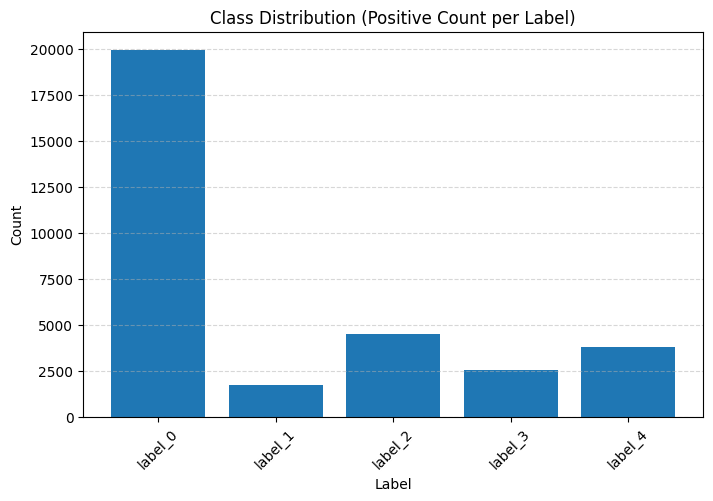

=== Raw Counts ===
label_0    19963
label_1     1706
label_2     4479
label_3     2549
label_4     3777
dtype: int64


In [37]:
import matplotlib.pyplot as plt
import pandas as pd

# label_0 ~ label_4 자동 추출
label_cols = [col for col in data.columns if col.startswith("label_")]

# 각 클래스의 positive 개수
class_counts = data[label_cols].sum().astype(int)

# 시각화
plt.figure(figsize=(8, 5))
plt.bar(class_counts.index, class_counts.values)
plt.title("Class Distribution (Positive Count per Label)")
plt.xlabel("Label")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

print("=== Raw Counts ===")
print(class_counts)


In [38]:
for group in data['intent_group'].unique():
    subset = data[data['intent_group'] == group]
    pos_sum = subset[label_cols].sum()
    print(f"\n=== {group} ===")
    print(pos_sum)



=== Communication ===
label_0    19963.0
label_1        0.0
label_2        0.0
label_3        0.0
label_4        0.0
dtype: float64

=== Teamwork_Leadership ===
label_0       0.0
label_1    1706.0
label_2       0.0
label_3       0.0
label_4       0.0
dtype: float64

=== Integrity ===
label_0       0.0
label_1       0.0
label_2    4479.0
label_3       0.0
label_4       0.0
dtype: float64

=== Adaptability ===
label_0       0.0
label_1       0.0
label_2       0.0
label_3    2549.0
label_4       0.0
dtype: float64

=== Job_Competency ===
label_0       0.0
label_1       0.0
label_2       0.0
label_3       0.0
label_4    3777.0
dtype: float64
